# Workshop 3: Linear, Time-Invariant Systems

#### 3.1.1 Implementing Convolution Using Numerical Integration


In [13]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt  
from scipy import signal

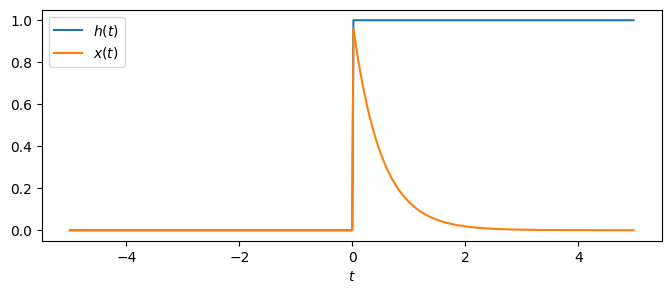

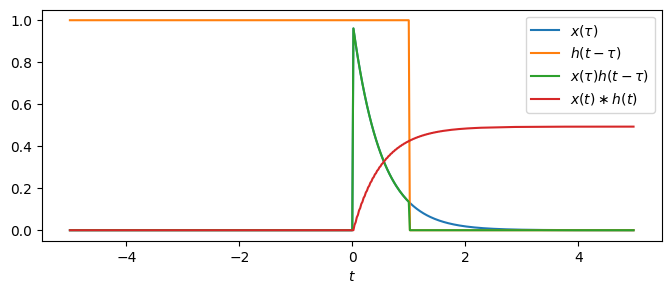

In [2]:
h = lambda t: (t > 0)*1.0
x = lambda t: (t > 0) * np.exp(-2*t) # a = −2
Fs = 50 # Sampling frequency for the plotting
T=5 #Timerange
t = np.arange(-T, T, 1/Fs) # Time samples

plt.figure(figsize=(8,3))
plt.plot(t, h(t), label='$h(t)$')
plt.plot(t, x(t), label='$x(t)$')
plt.xlabel(r'$t$')
plt.legend()

# Plotting
t_ = 1 # For illustration, choose some value for t
flipped = lambda tau: h(t_ - tau)
product = lambda tau: x(tau)*h(t_ - tau)
plt.figure(figsize=(8,3))
plt.plot(t, x(t), label=r'$x(\tau)$')
plt.plot(t, flipped(t), label=r'$h(t − \tau)$')
plt.plot(t, product(t), label=r'$x(\tau)h(t -\tau)$')

# Computing the convolution using integration
y = np.zeros(len(t))
for n, t_ in enumerate(t):
    product = lambda tau: x(tau) * h(t_ - tau)
    y[n] = integrate.simpson(y = product(t), x = t) # Actual convolution at time t
    
plt.plot(t, y, label=r'$x(t)\ast h(t)$') # Plotting the output y
plt.xlabel(r'$t$')
plt.legend()

task 2

In [3]:
fs = 1000 # Sampling frequency for the plotting
delta = lambda t: np.array([fs/10 if 0 < t_ and t_ < 1/(fs/10) else 0.0 for t_ in t])

In [4]:
t = np.arange(-T, T, 1/fs) 
y = integrate.simpson(y = delta(t), x= t)
print(y)

1.000000000000334


task 4

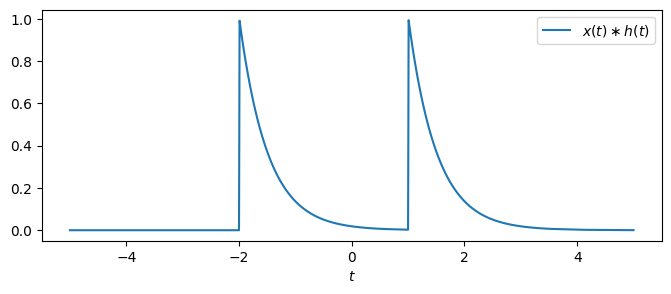

In [5]:
xt = lambda t: np.exp(-2*t) * (t > 0)
ht = lambda t: delta(t+2) + delta(t-1)

fs = 1000
T = 5
t = np.arange(-T, T, 1/fs)

y = np.zeros(len(t))
for n, t_ in enumerate(t):
    product_2 = lambda tau: xt(tau) * ht(t_ - tau)
    y[n] = integrate.simpson(y = product_2(t), x = t) 

plt.figure(figsize=(8,3))
plt.plot(t, y, label=r'$x(t)\ast h(t)$')
plt.xlabel(r'$t$')
plt.legend()

#### 3.2 Discrete-Time Systems: Convolution Sum

In [6]:
x = np.array([0, 1, 1, 2, 0])
h = np.array([0, 0, 0, 3, 1, 0, 0])
hr = np.flip(h)
xo = 2
ho = 4
y = np.zeros(len(x) + len(h) - 1)
for n in range(len(y)):
    xkmin = max(0, n - len(h) + 1)
    xkmax = min(len(x), n + 1)
    hkmin = max(0, len(h) - n -1)
    hkmax = min(len(h), len(x) + len(h) -n -1)
    y[n] = np.sum(x[xkmin:xkmax]*hr[hkmin:hkmax])
    print("y[{0}] = x[{1}:{2}]*h[{3}:{4}] = {5}".format(n, xkmin, xkmax, hkmin, hkmax, y[n]))


y[0] = x[0:1]*h[6:7] = 0.0
y[1] = x[0:2]*h[5:7] = 0.0
y[2] = x[0:3]*h[4:7] = 0.0
y[3] = x[0:4]*h[3:7] = 0.0
y[4] = x[0:5]*h[2:7] = 3.0
y[5] = x[0:5]*h[1:6] = 4.0
y[6] = x[0:5]*h[0:5] = 7.0
y[7] = x[1:5]*h[0:4] = 2.0
y[8] = x[2:5]*h[0:3] = 0.0
y[9] = x[3:5]*h[0:2] = 0.0
y[10] = x[4:5]*h[0:1] = 0.0


task 5

Text(0.5, 0, '$n$')

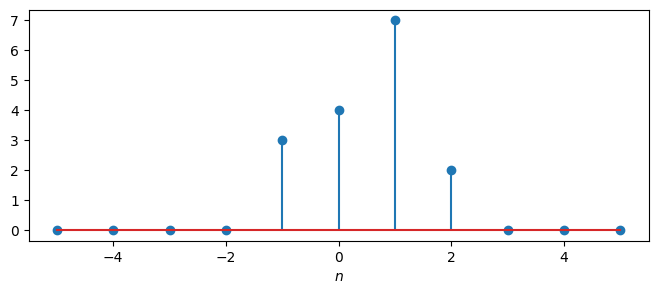

In [7]:
n = np.arange(-5, 6, 1)
plt.figure(figsize=(8,3))
plt.stem(n, y) 
plt.xlabel(r'$n$')

task 6

In [8]:
x = np.array([0, 0, 0, 1, 1, 2, 0, 0, 0])
h = np.array([0, 0, 0, 0, 1, 2, 0, 0, 0])
hr = np.flip(h)
xo = 2
ho = 4
y = np.zeros(len(x) + len(h) - 1)
for n in range(len(y)):
    xkmin = max(0, n - len(h) + 1)
    xkmax = min(len(x), n + 1)
    hkmin = max(0, len(h) - n -1)
    hkmax = min(len(h), len(x) + len(h) -n -1)
    y[n] = np.sum(x[xkmin:xkmax]*hr[hkmin:hkmax])
    print("y[{0}] = x[{1}:{2}]*h[{3}:{4}] = {5}".format(n, xkmin, xkmax, hkmin, hkmax, y[n]))


y[0] = x[0:1]*h[8:9] = 0.0
y[1] = x[0:2]*h[7:9] = 0.0
y[2] = x[0:3]*h[6:9] = 0.0
y[3] = x[0:4]*h[5:9] = 0.0
y[4] = x[0:5]*h[4:9] = 0.0
y[5] = x[0:6]*h[3:9] = 0.0
y[6] = x[0:7]*h[2:9] = 0.0
y[7] = x[0:8]*h[1:9] = 1.0
y[8] = x[0:9]*h[0:9] = 3.0
y[9] = x[1:9]*h[0:8] = 4.0
y[10] = x[2:9]*h[0:7] = 4.0
y[11] = x[3:9]*h[0:6] = 0.0
y[12] = x[4:9]*h[0:5] = 0.0
y[13] = x[5:9]*h[0:4] = 0.0
y[14] = x[6:9]*h[0:3] = 0.0
y[15] = x[7:9]*h[0:2] = 0.0
y[16] = x[8:9]*h[0:1] = 0.0


task 7

Text(0.5, 0, '$n$')

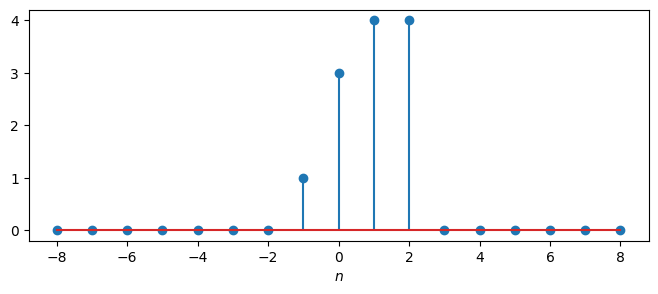

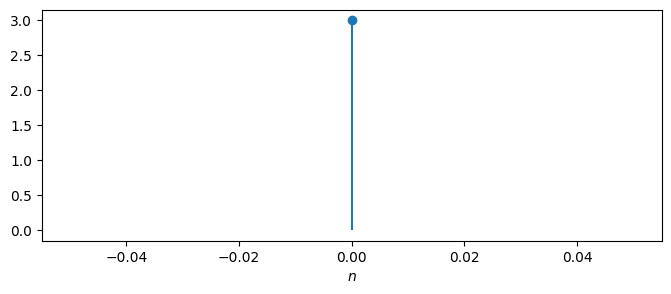

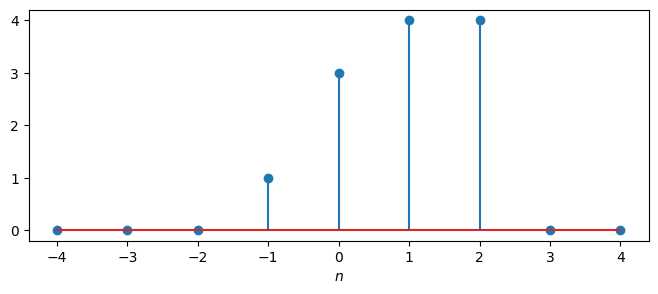

In [9]:
yFull = signal.convolve(x, h, mode='full')
yValid = signal.convolve(x, h, mode='valid')
ySame = signal.convolve(x, h, mode='same')

# Full
n = np.arange(-8, 9, 1)
plt.figure(figsize=(8,3))
plt.stem(n, yFull)
plt.xlabel(r'$n$')

# Valid
plt.figure(figsize=(8,3))
plt.stem(yValid) 
plt.xlabel(r'$n$')

# Same
n = np.arange(-4, 5, 1)
plt.figure(figsize=(8,3))
plt.stem(n, ySame) 
plt.xlabel(r'$n$')

task 8

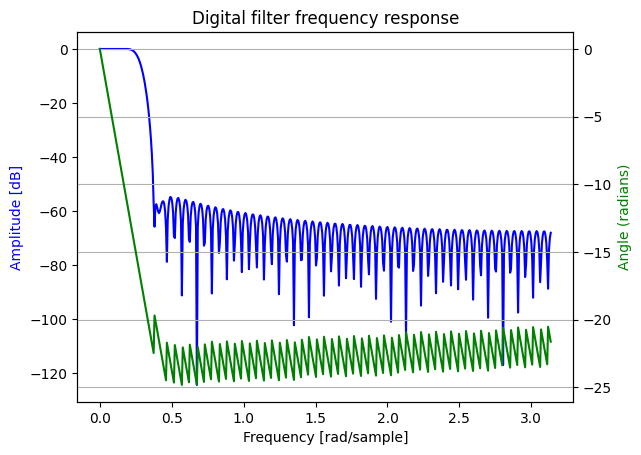

In [15]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
data, samplerate = sf.read('audio_file.wav')
nyquist = samplerate//2
fc = 2000/nyquist
n = 121
b = signal.firwin(n, fc, pass_zero=True)
w, h = signal.freqz(b)
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

ch1 = signal.convolve(data[:, 0], b, mode='same')
ch2 = signal.convolve(data[:, 1], b, mode='same')

sf.write('audio_file_filtered.wav', np.vstack((ch1, ch2)).T + data, samplerate)